# 영화 리뷰 분류: 이진 분류 예제

가중치를 업데이트 하는 것이 '옵티마이저', 예측 값 Y'와 실제타깃 값 Y를 비교 하는 것이 '손실함수'

In [7]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


num_words=10000 매개변수는 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미이다.

In [8]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
train_labels[0]

1

In [10]:
max([max(sequence) for sequence in train_data])

9999

In [11]:
import numpy as np

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

output = relu(dot(W, input) + b

16개의 은닉 유닛이 있다는 것은 가중치 행렬 W의 크기가 (input_dimension, 16)이라는 뜻이다. 입력 데이터와 W를 점곱하면 입력 데이터가 16차원으로 표현된 공간으로 투영된다. 은닉 유닛을 늘리면 신경망이 더욱 복잡한 표현을 학습할 수 있지만 계산 비용이 커지고 원하지 않는 패턴을 학습할 수도 있다.

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [26]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 90s 6ms/step - loss: 0.4922 - acc: 0.7982 - val_loss: 0.3698 - val_acc: 0.8739
Epoch 2/20
15000/15000 [==============================] - 4s 263us/step - loss: 0.2926 - acc: 0.9067 - val_loss: 0.2954 - val_acc: 0.8904
Epoch 3/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.2127 - acc: 0.9288 - val_loss: 0.2755 - val_acc: 0.8927
Epoch 4/20
15000/15000 [==============================] - 3s 201us/step - loss: 0.1695 - acc: 0.9446 - val_loss: 0.2726 - val_acc: 0.8910
Epoch 5/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.1404 - acc: 0.9550 - val_loss: 0.3271 - val_acc: 0.8721
Epoch 6/20
15000/15000 [==============================] - 3s 203us/step - loss: 0.1144 - acc: 0.9653 - val_loss: 0.3013 - val_acc: 0.8820
Epoch 7/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.0961 - acc: 0.9719 - val_loss: 0.3206 - v

훈련이 끝날 때마다 1만 개의 검증 샘플 데이터에서 손실과 정확도를 계산한다.(오른쪽의 'val_loss:'와 'val_acc')


model.fit() 매서드는 History 객체를 반환한다. 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 갖고 있다.

In [27]:
history_dict = history.history

In [28]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [29]:
import matplotlib.pyplot as plt

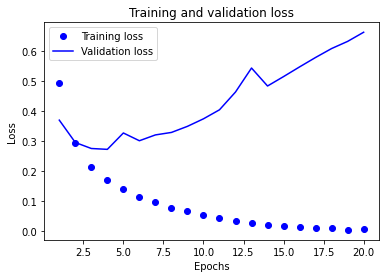

In [30]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  # 범례

plt.show()

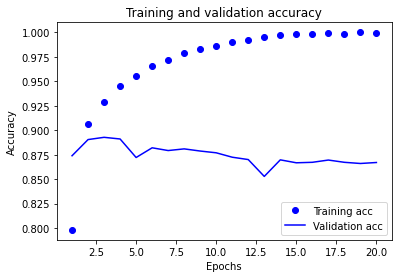

In [34]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()  # 범례

plt.show()

과대적합: 훈련 데이터에 과도하게 최적화되어 훈련 세트 이외의 데이터에는 일반화되지 못하는 것.

In [35]:
model.predict(x_test)

array([[0.01045003],
       [1.        ],
       [0.9948055 ],
       ...,
       [0.00542683],
       [0.02085977],
       [0.8410653 ]], dtype=float32)

여기처럼 이 모델은 어떤 샘플에 대해 확신을 가지고 있지만(0.99 또는 그 이상 혹은 0.01 또는 그 이하) 어떤 샘플에 대해서는 확신이 부족하다(0.6, 0.4).

# 뉴스 기사 분류: 다중 분류 문제

In [36]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [37]:
len(train_data)

8982

In [38]:
len(test_data)

2246

In [40]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [41]:
# 로이터 데이터셋을 텍스트로 디코딩하기

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# 0, 1, 2는 '패딩', '문서시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다.

557056/550378 [==============================] - 1s 2us/step


In [42]:
train_labels[10]

3

In [43]:
import numpy as np

In [44]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [45]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
noe_hot_test_labels = to_one_hot(test_labels)

In [46]:
from keras.utils.np_utils import to_categorical

In [47]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [48]:
from keras import models
from keras import layers

In [51]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [52]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [53]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [54]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 8s 1ms/step - loss: 2.6174 - accuracy: 0.4807 - val_loss: 1.7173 - val_accuracy: 0.6670
Epoch 2/20
7982/7982 [==============================] - 2s 214us/step - loss: 1.4162 - accuracy: 0.7111 - val_loss: 1.2987 - val_accuracy: 0.7110
Epoch 3/20
7982/7982 [==============================] - 2s 256us/step - loss: 1.0542 - accuracy: 0.7736 - val_loss: 1.1204 - val_accuracy: 0.7670
Epoch 4/20
7982/7982 [==============================] - 2s 208us/step - loss: 0.8272 - accuracy: 0.8301 - val_loss: 1.0243 - val_accuracy: 0.7930
Epoch 5/20
7982/7982 [==============================] - 2s 207us/step - loss: 0.6543 - accuracy: 0.8648 - val_loss: 0.9537 - val_accuracy: 0.8000
Epoch 6/20
7982/7982 [==============================] - 2s 212us/step - loss: 0.5198 - accuracy: 0.8959 - val_loss: 0.9293 - val_accuracy: 0.8010
Epoch 7/20
7982/7982 [==============================] - 2s 218us/step - loss: 

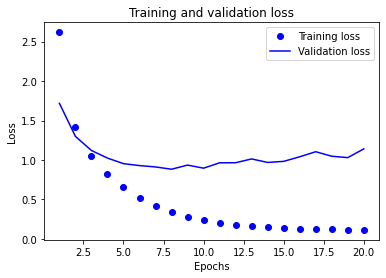

In [56]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [64]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [62]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 309us/step - loss: 2.6882 - accuracy: 0.5232 - val_loss: 1.7925 - val_accuracy: 0.6340
Epoch 2/9
7982/7982 [==============================] - 2s 225us/step - loss: 1.4608 - accuracy: 0.6951 - val_loss: 1.3357 - val_accuracy: 0.7020
Epoch 3/9
7982/7982 [==============================] - 2s 238us/step - loss: 1.0781 - accuracy: 0.7686 - val_loss: 1.1627 - val_accuracy: 0.7490
Epoch 4/9
7982/7982 [==============================] - 2s 239us/step - loss: 0.8517 - accuracy: 0.8201 - val_loss: 1.0594 - val_accuracy: 0.7810
Epoch 5/9
7982/7982 [==============================] - 2s 190us/step - loss: 0.6789 - accuracy: 0.8579 - val_loss: 0.9785 - val_accuracy: 0.7940
Epoch 6/9
7982/7982 [==============================] - 2s 206us/step - loss: 0.5385 - accuracy: 0.8882 - val_loss: 0.9224 - val_accuracy: 0.8120
Epoch 7/9
7982/7982 [==============================] - 2s 232us/step - loss: 0.432

In [65]:
results

[0.9943362445780346, 0.7853962779045105]

In [66]:
import copy

In [67]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1923419412288513

In [68]:
predictions = model.predict(x_test)

predictions[0].shape

In [70]:
np.sum(predictions[0])

1.0000001

In [72]:
np.argmax([predictions[0]])

3

* N개의 클래스로 데이터 포인트를 분류하려면 네트워크 마지막 Dense 층의 크기는 N이어야 한다.
* 단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해 softmax 활성화 함수를 사용해야 한다.
* 많은 수의 범주를 분류할 때 중간층의 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 해야 한다.

# 주택 가격 예측: 회귀 문제

회귀: 연속적인 값을 예측하는 것

In [3]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

다른 스케일을 가진 값을 신경망에 주입하면 문제가 된다. 이럴 때 대표적인 방법은 특성별로 정규화를 하는 것이다.

입력 데이터 행렬의 열에서 특성의 평균을 빼고 표준편차로 나눈다. 넘파이를 사용하면 간단하게 할 수 있다.

In [7]:
mean = train_data.mean(axis=0)  
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std  # std = 표준편차

데이터를 정규화 할 때는 과적합을 예방하기 위해 무조건 훈련 데이터 값만 사용한다.

(axis=0)는 열 연산, (axis=1)인 경우는 행 연산. 디폴트 값은 (axis=0)

In [11]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

이 네트워크의 마지막 층은 하나의 유닛을 가지고 있고 활성화 함수는 없다. 활성화 함수를 적용하면 출력 값의 범위를 제한하게 되기 때문이다. 예를 들어 마지막 층에 sigmoid 활성화 함수를 적용하면 네트워크가 0과 1 사이의 값을 예측하도록 학습될 것이다. 위에서는 마지막 층이 순수한 선형이므로 네트워크가 어떤 범위의 값이더라도 자유롭게 예측할 수 있다.

mes 손실함수는 '평균 제곱 오차'의 약어로 예측과 타깃 사이 거리의 제곱이다. 회귀 문제에서 널리 사용되는 손실 함수이다.


데이터를 훈련 세트와 검증 세트로 나눌 때, 데이터 포인트가 많지 않은 경우 검증 세트가 매우 작아진다. 그러면 검증 세트와 훈련 세트로 어떤 데이터가 선택되었는지에 따라 검증 점수가 크게 달라지게 된다. 이렇게 되면 신뢰 있는 모델 평가를 할 수 없다. 이런 상황에서 가장 좋은 방법은 K-겹 교차 검증을 사용하는 것이다.(일반적으로 K=4 또는 5)

In [12]:
import numpy as np

k = 4

num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0


UnboundLocalError: local variable 'batch_index' referenced before assignment